In [1]:
import pandas as pd
import numpy as np

In [75]:
kish = pd.read_csv(r'C:\\Users\Gilad\train\7557\SimpleTest\5.csv')
kish

,X,Y,Pressure,TiltX,TiltY,Time
0,774.499595796281,651.059938,0.535882,3763.0,-871.0,00:01.7456720
1,771.234553643608,650.796628,0.553460,3763.0,-871.0,00:01.7616647
2,769.075412865227,649.585402,0.561273,3763.0,-871.0,00:01.7774846
3,767.284905878277,647.004966,0.579583,3763.0,-871.0,00:01.7774846
4,766.863610116642,646.109712,0.589349,3763.0,-871.0,00:01.7930025
...,...,...,...,...,...,...
262,869.343804134427,662.645571,0.842527,2929.0,-701.0,00:05.6838811
263,869.238480194018,662.961543,0.836423,2929.0,-701.0,00:05.6994045
264,869.133156253609,663.856796,0.741451,2879.0,-687.0,00:05.6994045
265,Time Elapsed till drawing started: 00:01.7299936,NaN,NaN,NaN,NaN,NaN


In [76]:
kish.dropna(axis = 0, inplace = True)

In [77]:
kish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          265 non-null    object 
 1    Y         265 non-null    float64
 2    Pressure  265 non-null    float64
 3    TiltX     265 non-null    float64
 4    TiltY     265 non-null    float64
 5    Time      265 non-null    object 
dtypes: float64(4), object(2)
memory usage: 14.5+ KB


In [78]:
kish.columns

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')

In [79]:
kish.columns = kish.columns.str.replace(' ','')

In [80]:
kish.columns

Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

In [81]:
kish[['min', 'sec']] = kish.Time.str.split(':',expand = True)

In [82]:
kish.drop('Time', axis = 1, inplace = True)

In [83]:
kish[['min', 'sec']] = kish[['min', 'sec']].astype('float64', )

In [84]:
kish.sec = kish['sec'] + kish['min'] * 60.0

In [85]:
kish.drop('min', axis = 1, inplace = True)

In [86]:
kish.X = kish.X.astype('float64')

In [87]:
kish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         265 non-null    float64
 1   Y         265 non-null    float64
 2   Pressure  265 non-null    float64
 3   TiltX     265 non-null    float64
 4   TiltY     265 non-null    float64
 5   sec       265 non-null    float64
dtypes: float64(6)
memory usage: 14.5 KB


In [88]:
kish['s_X'] = kish.X.shift()

In [89]:
kish['s_Y'] = kish.Y.shift()

In [90]:
kish['s_sec'] = kish.sec.shift()

In [91]:
kish.s_sec = abs(kish.sec - kish.s_sec)

<AxesSubplot:>

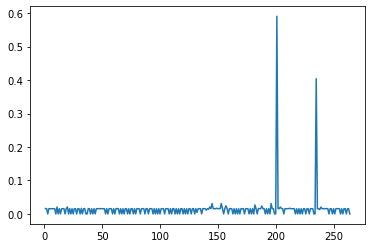

In [92]:
kish.s_sec.plot()

In [93]:
lines = kish[kish['s_sec'] > 0.1]
lines

,X,Y,Pressure,TiltX,TiltY,sec,s_X,s_Y,s_sec
201,881.877353,637.736459,0.045884,2507.0,-329.0,4.568045,880.929438,633.786811,0.590610
235,879.244255,635.577318,0.331044,3401.0,-842.0,5.353670,908.471648,657.379374,0.404057


In [94]:
print('So, the pen was lifted',len(kish[kish['s_sec'] > 0.1]),'times' )

So, the pen was lifted 2 times


In [95]:
kish.fillna(value = 0, inplace=True)

In [96]:
kish['m'] = (kish['Y'] - kish['s_Y']) / (kish['X'] - kish['s_X'])

In [97]:
kish

,X,Y,Pressure,TiltX,TiltY,sec,s_X,s_Y,s_sec,m
0,774.499596,651.059938,0.535882,3763.0,-871.0,1.745672,0.000000,0.000000,0.000000,0.840620
1,771.234554,650.796628,0.553460,3763.0,-871.0,1.761665,774.499596,651.059938,0.015993,0.080645
2,769.075413,649.585402,0.561273,3763.0,-871.0,1.777485,771.234554,650.796628,0.015820,0.560976
3,767.284906,647.004966,0.579583,3763.0,-871.0,1.777485,769.075413,649.585402,0.000000,1.441176
4,766.863610,646.109712,0.589349,3763.0,-871.0,1.793003,767.284906,647.004966,0.015518,2.125000
...,...,...,...,...,...,...,...,...,...,...
260,869.817762,661.644994,0.860105,2929.0,-701.0,5.668158,870.713015,659.643839,0.015627,-2.235294
261,869.501790,662.329599,0.848630,2929.0,-701.0,5.668158,869.817762,661.644994,0.000000,-2.166667
262,869.343804,662.645571,0.842527,2929.0,-701.0,5.683881,869.501790,662.329599,0.015723,-2.000000
263,869.238480,662.961543,0.836423,2929.0,-701.0,5.699404,869.343804,662.645571,0.015523,-3.000000


<AxesSubplot:>

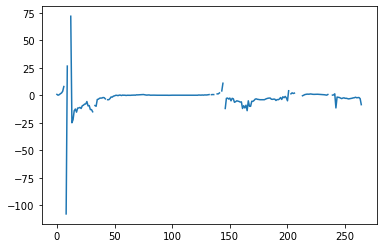

In [98]:
kish.m.plot()

In [99]:
kish['m_diff'] = np.abs(kish.m - kish.m.shift()) 

<AxesSubplot:>

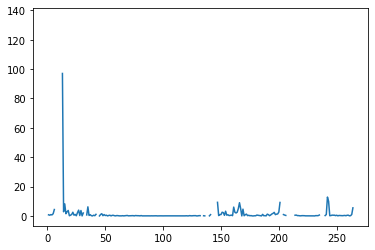

In [100]:
kish.m_diff.plot()

In [166]:
lines = []
for i in kish.index:
    if kish.iloc[i].m_diff <=2 and kish.iloc[i].m_diff != np.nan :
        start = i
        end = i
        while i < len(kish) and kish.iloc[i].m_diff <=2:
            end = end + 1 
            i = end
        i = end
        if end - start >= 10:
            if len(lines) > 0 and end - lines[len(lines)-1][1] > 1:
                lines.append((start, end))
            if len(lines) == 0:
                lines.append((start, end))

In [167]:
lines

[(45, 133), (170, 196), (214, 236), (244, 264)]

In [169]:
print('there are', len(lines), 'lines drawn')

there are 4 lines drawn


In [177]:
pavg = []
for l in lines:
    t = []
    for i in range (l[0], l[1]):
        t.append(kish.Pressure[i])
    pavg.append(sum(t)/len(t))

In [178]:
pavg

[0.8724151646549051,
 0.9491804150434641,
 0.7693501751531254,
 0.8410254091024397]

In [180]:
leng = []
for l in lines:
    t = []
    for i in range(l[0] + 1, l[1]):
        dist = np.sqrt( (kish.X[i] - kish.X[i-1])**2 + (kish.Y[i] - kish.Y[i-1])**2 )
        t.append(dist)
    leng.append(sum(t))
    

In [181]:
leng

[125.77338167790131, 43.92511940685221, 70.3786603059607, 24.79261082877317]